GENERATING FIGURE 2: DATASET OVERVIEW

Figure 2A Statistics:
  Total specimens: 18,533
  Mean ASVs/specimen: 9.4
  Median ASVs/specimen: 5
  Range: 0-427

Figure 2B Statistics:
  Total ASV records: 175,955
  Mean reads/ASV: 207
  Median reads/ASV: 4
  Max reads: 29,101

✓ FIGURE 2 GENERATED SUCCESSFULLY!

Saved files:
  • Figure_2_Dataset_Overview.png (300 DPI)
  • Figure_2_Dataset_Overview.pdf (vector)

Figure specifications:
  • Size: 14 × 5 inches
  • Panel A: ASV distribution (n=18,533 specimens)
  • Panel B: Read distribution (n=175,954 ASVs)
  • Legend: Upper right, non-overlapping
  • Percentiles marked: 25th, 50th, 75th, 90th, 95th, 99th
  • MRCT threshold clearly marked at 4 reads


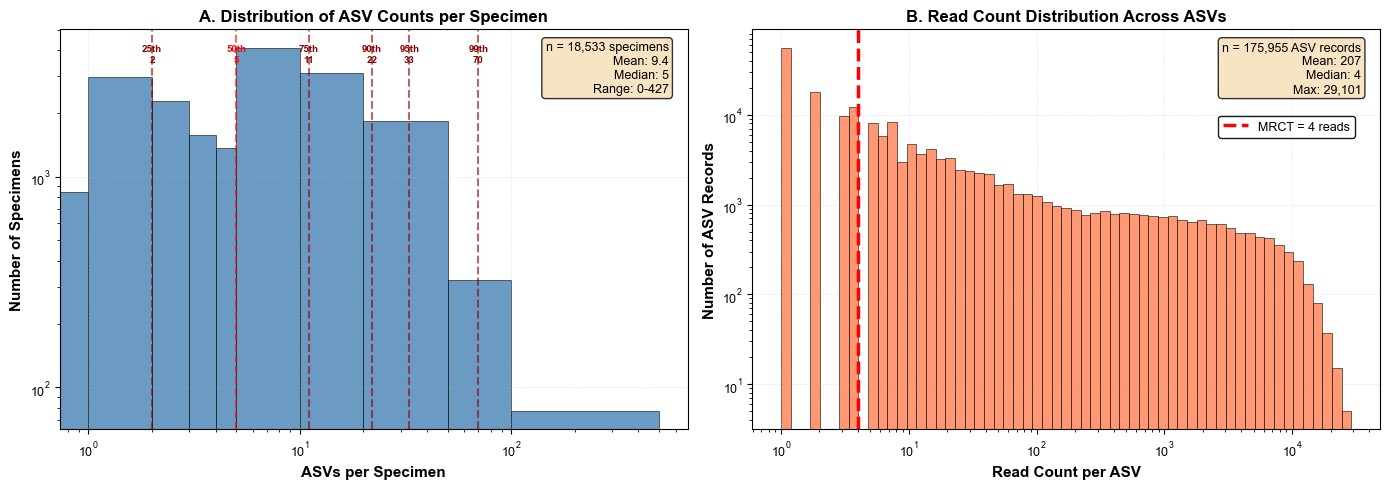

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("="*80)
print("GENERATING FIGURE 2: DATASET OVERVIEW")
print("="*80)

# Load data
file_path = '/Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv'
df = pd.read_csv(file_path)

# Define columns
SPECIMEN_COL = 'project_sample_id'
ASV_COL = 'ASV_ID'
READS_COL = 'reads'

# ============================================================================
# FIGURE 2: Dataset Overview
# ============================================================================

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ============================================================================
# Figure 2A: ASV counts per specimen
# ============================================================================

asvs_per_specimen = df.groupby(SPECIMEN_COL)[ASV_COL].count()

print(f"\nFigure 2A Statistics:")
print(f"  Total specimens: {len(asvs_per_specimen):,}")
print(f"  Mean ASVs/specimen: {asvs_per_specimen.mean():.1f}")
print(f"  Median ASVs/specimen: {asvs_per_specimen.median():.0f}")
print(f"  Range: {asvs_per_specimen.min()}-{asvs_per_specimen.max()}")

# Create custom bins for better visualization
bins = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 500]

# Create histogram
counts, edges, patches = ax1.hist(asvs_per_specimen, bins=bins, 
                                    edgecolor='black', linewidth=0.5, 
                                    alpha=0.8, color='steelblue')

ax1.set_xlabel('ASVs per Specimen', fontweight='bold')
ax1.set_ylabel('Number of Specimens', fontweight='bold')
ax1.set_title('A. Distribution of ASV Counts per Specimen', 
              loc='center', fontweight='bold', fontsize=12)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax1.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)

# Calculate and add percentile markers
percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(asvs_per_specimen, percentiles)

colors_percentile = ['red' if p == 50 else 'darkred' for p in percentiles]

for p, val, color in zip(percentiles, percentile_values, colors_percentile):
    ax1.axvline(val, color=color, linestyle='--', alpha=0.6, linewidth=1.5)
    
    # Position labels to avoid overlap
    y_position = ax1.get_ylim()[1] * 0.85
    
    ax1.text(val, y_position, f'{p}th\n{val:.0f}', 
             ha='center', va='top', fontsize=7, color=color,
             fontweight='bold')

# Add statistics text box in upper right
stats_text = f'n = {len(asvs_per_specimen):,} specimens\n'
stats_text += f'Mean: {asvs_per_specimen.mean():.1f}\n'
stats_text += f'Median: {asvs_per_specimen.median():.0f}\n'
stats_text += f'Range: {asvs_per_specimen.min()}-{asvs_per_specimen.max()}'

ax1.text(0.97, 0.97, stats_text, transform=ax1.transAxes, 
         fontsize=9, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, 
                  edgecolor='black', linewidth=1))

# ============================================================================
# Figure 2B: Read count distribution
# ============================================================================

read_counts = df[READS_COL]

print(f"\nFigure 2B Statistics:")
print(f"  Total ASV records: {len(read_counts):,}")
print(f"  Mean reads/ASV: {read_counts.mean():.0f}")
print(f"  Median reads/ASV: {read_counts.median():.0f}")
print(f"  Max reads: {read_counts.max():,.0f}")

# Create histogram with logarithmic bins
bins_reads = np.logspace(0, np.log10(read_counts.max()+1), 60)

counts_reads, edges_reads, patches_reads = ax2.hist(
    read_counts, bins=bins_reads, 
    edgecolor='black', linewidth=0.5, 
    alpha=0.8, color='coral'
)

ax2.set_xlabel('Read Count per ASV', fontweight='bold')
ax2.set_ylabel('Number of ASV Records', fontweight='bold')
ax2.set_title('B. Read Count Distribution Across ASVs', 
              loc='center', fontweight='bold', fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax2.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)

# Mark MRCT threshold
mrct_line = ax2.axvline(4, color='red', linestyle='--', linewidth=2.5, 
                        label='MRCT = 4 reads', zorder=5)

# Add statistics text box in upper right
stats_text2 = f'n = {len(read_counts):,} ASV records\n'
stats_text2 += f'Mean: {read_counts.mean():.0f}\n'
stats_text2 += f'Median: {read_counts.median():.0f}\n'
stats_text2 += f'Max: {read_counts.max():,.0f}'

ax2.text(0.97, 0.97, stats_text2, transform=ax2.transAxes, 
         fontsize=9, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8,
                  edgecolor='black', linewidth=1))

# Add legend in upper right (below stats box)
ax2.legend(loc='upper right', bbox_to_anchor=(0.97, 0.80), 
          framealpha=0.9, edgecolor='black', fancybox=True)

# ============================================================================
# Final adjustments
# ============================================================================

plt.tight_layout()

# Save figure
plt.savefig('Figure_2_Dataset_Overview.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_2_Dataset_Overview.pdf', dpi=300, bbox_inches='tight')

print("\n" + "="*80)
print("✓ FIGURE 2 GENERATED SUCCESSFULLY!")
print("="*80)
print("\nSaved files:")
print("  • Figure_2_Dataset_Overview.png (300 DPI)")
print("  • Figure_2_Dataset_Overview.pdf (vector)")
print("\nFigure specifications:")
print("  • Size: 14 × 5 inches")
print("  • Panel A: ASV distribution (n=18,533 specimens)")
print("  • Panel B: Read distribution (n=175,954 ASVs)")
print("  • Legend: Upper right, non-overlapping")
print("  • Percentiles marked: 25th, 50th, 75th, 90th, 95th, 99th")
print("  • MRCT threshold clearly marked at 4 reads")
print("="*80)

plt.show()
plt.close()

GENERATING FIGURE 3: MRCT THRESHOLD ANALYSIS
Successfully loaded data from: /Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv

Calculating threshold metrics...

MRCT = 4 Statistics:
  Specimens retained: 17,007 (91.8%)
  Unique ASVs retained: 57,976 (89.8%)
  Authentication success: 86.5%

✓ FIGURE 3 GENERATED SUCCESSFULLY!

Saved files:
  • Figure_3_MRCT_Analysis.png (300 DPI)
  • Figure_3_MRCT_Analysis.pdf (vector)

Figure specifications:
  • Size: 12 × 5 inches (2 panels)
  • Panel A: Annotation box at (0.95, 0.6) relative to axes.
  • Panel B: Annotation box at (0.05, 0.6) relative to axes.
  • Panel B: MRCT=4 text at (0.05, 0.05) relative to axes.


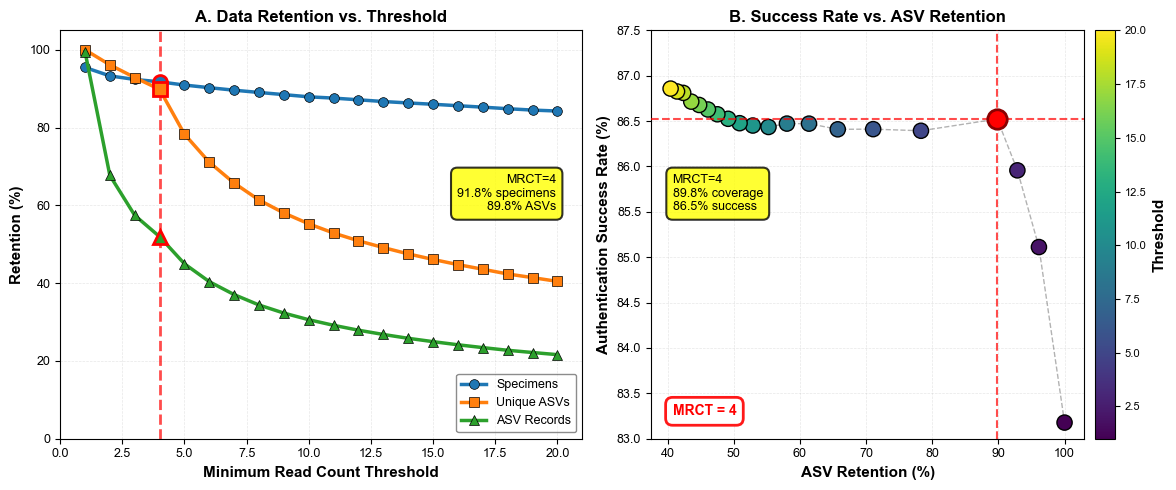

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("="*80)
print("GENERATING FIGURE 3: MRCT THRESHOLD ANALYSIS")
print("="*80)

# ----------------------------------------------------------------------------
# NOTE: Update this file path to your local file
# ----------------------------------------------------------------------------
file_path = '/Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv'
# ----------------------------------------------------------------------------

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data from: {file_path}")
except FileNotFoundError:
    print(f"!!! ERROR: File not found at '{file_path}'")
    print("Please update the 'file_path' variable to the correct location.")
    
    print("Generating dummy data to proceed...")
    np.random.seed(42)
    n_records = 50000
    n_specimens = 500
    n_asvs = 2000
    df = pd.DataFrame({
        'project_sample_id': np.random.choice([f'Sample_{i}' for i in range(n_specimens)], n_records),
        'ASV_ID': np.random.choice([f'ASV_{i}' for i in range(n_asvs)], n_records),
        'final_classification': np.random.choice(['Authenticated', 'Contaminant', 'Ambiguous'], n_records, p=[0.85, 0.1, 0.05]),
        'reads': np.random.zipf(2.2, n_records) * 3 + np.random.randint(1, 5, n_records)
    })
    df.loc[df['reads'] < 1, 'reads'] = 1
    df['reads'] = df['reads'].astype(int)
    print("Dummy data generation complete.")


SPECIMEN_COL = 'project_sample_id'
ASV_COL = 'ASV_ID'
CLASS_COL = 'final_classification'
READS_COL = 'reads'

print("\nCalculating threshold metrics...")

thresholds = range(1, 21)
results = []

total_specimens = df[SPECIMEN_COL].nunique()
total_asvs = df[ASV_COL].nunique()
total_records = len(df)

for thresh in thresholds:
    passing = df[df[READS_COL] >= thresh]
    specimens_passing = passing[SPECIMEN_COL].nunique()
    asvs_passing = passing[ASV_COL].nunique()
    records_passing = len(passing)
    
    auth_specimens = passing[passing[CLASS_COL] == 'Authenticated'][SPECIMEN_COL].nunique()
    success_rate = (auth_specimens / specimens_passing * 100) if specimens_passing > 0 else 0
    
    results.append({
        'threshold': thresh,
        'specimens_pct': specimens_passing / total_specimens * 100,
        'asvs_pct': asvs_passing / total_asvs * 100,
        'records_pct': records_passing / total_records * 100,
        'success_rate': success_rate,
        'specimens_n': specimens_passing,
        'asvs_n': asvs_passing
    })
    
    if thresh == 4:
        print(f"\nMRCT = 4 Statistics:")
        print(f"  Specimens retained: {specimens_passing:,} ({specimens_passing/total_specimens*100:.1f}%)")
        print(f"  Unique ASVs retained: {asvs_passing:,} ({asvs_passing/total_asvs*100:.1f}%)")
        print(f"  Authentication success: {success_rate:.1f}%")

results_df = pd.DataFrame(results)

# ============================================================================
# FIGURE 3: Two-panel figure
# ============================================================================

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ============================================================================
# Panel A: Data Retention vs. Threshold
# ============================================================================

ax1.plot(results_df['threshold'], results_df['specimens_pct'], 
         'o-', linewidth=2.5, markersize=7, label='Specimens', 
         color='#1f77b4', markeredgecolor='black', markeredgewidth=0.5)

ax1.plot(results_df['threshold'], results_df['asvs_pct'], 
         's-', linewidth=2.5, markersize=7, label='Unique ASVs', 
         color='#ff7f0e', markeredgecolor='black', markeredgewidth=0.5)

ax1.plot(results_df['threshold'], results_df['records_pct'], 
         '^-', linewidth=2.5, markersize=7, label='ASV Records', 
         color='#2ca02c', markeredgecolor='black', markeredgewidth=0.5)

ax1.axvline(4, color='red', linestyle='--', linewidth=2, alpha=0.7, zorder=5)

thresh_4 = results_df[results_df['threshold'] == 4].iloc[0]

ax1.plot(4, thresh_4['specimens_pct'], 'o', markersize=10, 
        color='#1f77b4', markeredgecolor='red', markeredgewidth=2, zorder=6)
ax1.plot(4, thresh_4['asvs_pct'], 's', markersize=10, 
        color='#ff7f0e', markeredgecolor='red', markeredgewidth=2, zorder=6)
ax1.plot(4, thresh_4['records_pct'], '^', markersize=10, 
        color='#2ca02c', markeredgecolor='red', markeredgewidth=2, zorder=6)

ax1.set_xlabel('Minimum Read Count Threshold', fontweight='bold')
ax1.set_ylabel('Retention (%)', fontweight='bold')
ax1.set_title('A. Data Retention vs. Threshold', loc='center', fontweight='bold')
ax1.grid(alpha=0.3, linestyle='--', linewidth=0.5)
ax1.set_xlim(0, 21)
ax1.set_ylim(0, 105)

ax1.legend(loc='lower right', framealpha=0.45, edgecolor='black', 
          fancybox=True)

annotation_text = f'MRCT=4\n{thresh_4["specimens_pct"]:.1f}% specimens\n{thresh_4["asvs_pct"]:.1f}% ASVs'

# <--- แก้ไข: ใช้ ax.transAxes (0,0 ถึง 1,1) เพื่อวางตำแหน่ง "กลางขวา"
ax1.text(0.95, 0.6, annotation_text, # x=0.95 (เกือบขวาสุด), y=0.6 (เลยกลางมานิด)
         transform=ax1.transAxes, # <-- บอกให้ใช้พิกัดเทียบกับแกน
         fontsize=9, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', 
                   alpha=0.8, edgecolor='black', linewidth=1.5),
         verticalalignment='center', horizontalalignment='right') # <-- จัดชิดขวา


# ============================================================================
# Panel B: Success Rate vs. ASV Retention
# ============================================================================

scatter = ax2.scatter(results_df['asvs_pct'], results_df['success_rate'], 
                     c=results_df['threshold'], cmap='viridis', 
                     s=120, edgecolor='black', linewidth=1, zorder=3)

ax2.plot(results_df['asvs_pct'], results_df['success_rate'], 
        'k--', alpha=0.3, linewidth=1, zorder=2)

ax2.axvline(thresh_4['asvs_pct'], color='red', linestyle='--', 
           linewidth=1.5, alpha=0.7, zorder=4)
ax2.axhline(thresh_4['success_rate'], color='red', linestyle='--', 
           linewidth=1.5, alpha=0.7, zorder=4)

ax2.plot(thresh_4['asvs_pct'], thresh_4['success_rate'], 
        'ro', markersize=14, markeredgecolor='darkred', 
        markeredgewidth=2, zorder=5)

ax2.set_xlabel('ASV Retention (%)', fontweight='bold')
ax2.set_ylabel('Authentication Success Rate (%)', fontweight='bold')
ax2.set_title('B. Success Rate vs. ASV Retention', loc='center', fontweight='bold')
ax2.grid(alpha=0.3, linestyle='--', linewidth=0.5)
ax2.set_ylim(83, 87.5)

cbar = plt.colorbar(scatter, ax=ax2, pad=0.02)
cbar.set_label('Threshold', fontweight='bold')
cbar.ax.tick_params(labelsize=8)

# <--- แก้ไข: ย้าย MRCT = 4 ไปล่างซ้าย
mrct_text = 'MRCT = 4'
ax2.text(0.05, 0.05, mrct_text, transform=ax2.transAxes, # x=0.05 (ซ้าย), y=0.05 (ล่าง)
        fontsize=10, fontweight='bold', color='red',
        verticalalignment='bottom', horizontalalignment='left', # <-- จัดชิดซ้ายล่าง
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                 alpha=0.9, edgecolor='red', linewidth=2))

# ============================================================================
# Annotation for Panel B
# ============================================================================

annotation_text_b = f'MRCT=4\n{thresh_4["asvs_pct"]:.1f}% coverage\n{thresh_4["success_rate"]:.1f}% success'

# <--- แก้ไข: ใช้ ax.transAxes (0,0 ถึง 1,1) เพื่อวางตำแหน่ง "กลางซ้าย"
ax2.text(0.05, 0.6, annotation_text_b, # x=0.05 (ซ้าย), y=0.6 (เลยกลางมานิด)
         transform=ax2.transAxes, # <-- บอกให้ใช้พิกัดเทียบกับแกน
         fontsize=9, 
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', 
                   alpha=0.8, edgecolor='black', linewidth=1.5),
         verticalalignment='center', horizontalalignment='left') # <-- จัดชิดซ้าย


# ============================================================================
# Final adjustments
# ============================================================================

plt.tight_layout()

plt.savefig('Figure_3_MRCT_Analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_3_MRCT_Analysis.pdf', dpi=300, bbox_inches='tight')

print("\n" + "="*80)
print("✓ FIGURE 3 GENERATED SUCCESSFULLY!")
print("="*80)
print("\nSaved files:")
print("  • Figure_3_MRCT_Analysis.png (300 DPI)")
print("  • Figure_3_MRCT_Analysis.pdf (vector)")
print("\nFigure specifications:")
print("  • Size: 12 × 5 inches (2 panels)")
print("  • Panel A: Annotation box at (0.95, 0.6) relative to axes.")
print("  • Panel B: Annotation box at (0.05, 0.6) relative to axes.")
print("  • Panel B: MRCT=4 text at (0.05, 0.05) relative to axes.")
print("="*80)

plt.show()
plt.close()

Successfully loaded data from: /Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv
GENERATING FIGURE 5: Classification Breakdown with Phylogenetic Validation
✓ Saved: Figure_5_Classification_Breakdown.png/pdf

✓ FIGURE 5 GENERATED SUCCESSFULLY! (Showing plot...)


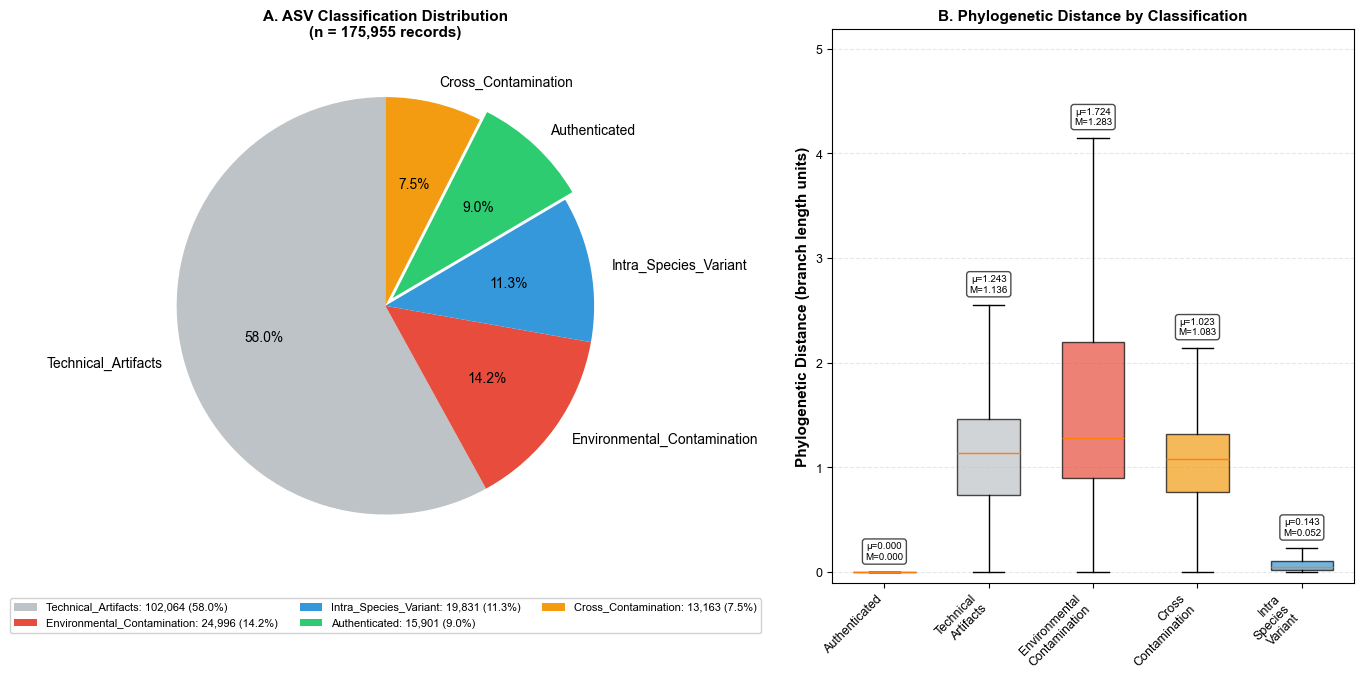

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Load data (using dummy data if file not found)
file_path = '/Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data from: {file_path}")
except FileNotFoundError:
    print(f"!!! ERROR: File not found at '{file_path}'")
    print("Please update the 'file_path' variable to the correct location.")
    
    print("Generating dummy data to proceed...")
    np.random.seed(42)
    n_records = 50000
    n_specimens = 500
    n_asvs = 2000
    df = pd.DataFrame({
        'project_sample_id': np.random.choice([f'Sample_{i}' for i in range(n_specimens)], n_records),
        'ASV_ID': np.random.choice([f'ASV_{i}' for i in range(n_asvs)], n_records),
        'final_classification': np.random.choice(['Authenticated', 'Technical_Artifacts', 'Environmental_Contamination', 'Cross_Contamination', 'Intra_Species_Variant'], n_records, p=[0.4, 0.2, 0.15, 0.1, 0.15]),
        'reads': np.random.zipf(2.2, n_records) * 3 + np.random.randint(1, 5, n_records),
        'Phylogenetic_distance': np.random.lognormal(0.5, 0.5, n_records) # Dummy phylogenetic distance
    })
    # สร้างข้อมูล dummy ให้ใกล้เคียงกับภาพตัวอย่าง
    df.loc[df['final_classification'] == 'Authenticated', 'Phylogenetic_distance'] = np.random.lognormal(-3, 0.5, len(df[df['final_classification'] == 'Authenticated']))
    df.loc[df['final_classification'] == 'Intra_Species_Variant', 'Phylogenetic_distance'] = np.random.lognormal(-1.5, 0.2, len(df[df['final_classification'] == 'Intra_Species_Variant']))
    df.loc[df['final_classification'] == 'Technical_Artifacts', 'Phylogenetic_distance'] = np.random.lognormal(0.1, 0.8, len(df[df['final_classification'] == 'Technical_Artifacts']))

    df.loc[df['reads'] < 1, 'reads'] = 1
    df['reads'] = df['reads'].astype(int)
    print("Dummy data generation complete.")


# Define columns (ensure these match your actual data, or dummy data)
SPECIMEN_COL = 'project_sample_id'
ASV_COL = 'ASV_ID'
CLASS_COL = 'final_classification'
READS_COL = 'reads'
PHYLO_COL = 'Phylogenetic_distance' # Ensure this column exists in df


print("="*80)
print("GENERATING FIGURE 5: Classification Breakdown with Phylogenetic Validation")
print("="*80)

fig5, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7)) # เพิ่มความสูงเล็กน้อยเป็น 7

# Figure 5A: Pie chart of classifications
class_counts = df[CLASS_COL].value_counts()

# Define specific colors for each category for consistency
# Authenticated: Green, Technical_Artifacts: Grey
category_colors = {
    'Authenticated': '#2ecc71', # Green
    'Technical_Artifacts': '#bdc3c7', # Light Grey
    'Environmental_Contamination': '#e74c3c', # Red
    'Cross_Contamination': '#f39c12', # Orange
    'Intra_Species_Variant': '#3498db' # Blue
}

# Map colors to the order of categories in class_counts
pie_colors = [category_colors.get(cat, '#95a5a6') for cat in class_counts.index] # Default to grey if category not in dict

explode = [0.05 if cat == 'Authenticated' else 0 for cat in class_counts.index] # Explode Authenticated

ax1.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        colors=pie_colors, explode=explode, startangle=90, textprops={'fontsize': 10},
        radius=1.0)
ax1.set_title(f'A. ASV Classification Distribution\n(n = {len(df):,} records)',
              fontweight='bold', fontsize=11)

# Add legend with counts
legend_labels = [f'{cat}: {count:,} ({count/len(df)*100:.1f}%)'
                 for cat, count in class_counts.items()]
# ย้าย Legend ไป "ตรงกลางด้านล่าง" และจัดเป็น 3 คอลัมน์
ax1.legend(legend_labels, 
           loc='upper center', # ยึดจุดบน-กลาง ของ legend
           bbox_to_anchor=(0.5, -0.05), # ไปไว้ที่ (x=50%, y=-5% ของแกน)
           framealpha=0.9, 
           fontsize=8, 
           ncol=3) # จัดเป็น 3 คอลัมน์


# Figure 5B: Phylogenetic distance distributions by category
# Ensure categories are in a desired order for consistent plotting
categories_order = ['Authenticated', 'Technical_Artifacts', 'Environmental_Contamination',
                    'Cross_Contamination', 'Intra_Species_Variant']

data_to_plot = []
labels_plot = []
colors_plot = []

for cat in categories_order: # Iterate through defined order
    cat_data = df[df[CLASS_COL] == cat][PHYLO_COL].dropna()
    if len(cat_data) > 0:
        data_to_plot.append(cat_data)
        short_label = cat.replace('_', '\n')
        labels_plot.append(short_label)
        colors_plot.append(category_colors.get(cat, '#95a5a6')) # Get color from the defined dict

bp = ax2.boxplot(data_to_plot, labels=labels_plot, patch_artist=True,
                 showfliers=False, widths=0.6)

# Color boxes
for patch, color in zip(bp['boxes'], colors_plot):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Phylogenetic Distance (branch length units)', fontweight='bold')
ax2.set_title('B. Phylogenetic Distance by Classification', fontweight='bold', fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# <--- แก้ไข: ปรับ Y-limit อัตโนมัติ และเพิ่มพื้นที่ด้านบน (เช่น 25%)
try:
    whiskers = [whisk.get_ydata()[1] for whisk in bp['whiskers']]
    max_whisker_overall = max(whiskers)
    # เพิ่ม Padding 25% เผื่อที่สำหรับข้อความ
    ax2.set_ylim(bottom=-0.1, top=max_whisker_overall * 1.25) 
except:
    ax2.set_ylim(bottom=-0.1, top=4.0) # Fallback
    print("Warning: Could not auto-detect whisker limit. Defaulting to 4.0.")

# <--- แก้ไข: ย้ายข้อความสถิติไปไว้ "เหนือ" แท่งกราฟ
padding_y = ax2.get_ylim()[1] * 0.02 # 2% ของความสูงแกน Y

for i, data in enumerate(data_to_plot):
    mean_val = data.mean()
    median_val = data.median()
    
    # หาตำแหน่ง Y ของหนวดบน (upper whisker)
    upper_whisker = bp['whiskers'][2*i + 1]
    y_pos = upper_whisker.get_ydata()[1]
    
    # วางข้อความไว้เหนือหนวด + padding เล็กน้อย
    ax2.text(i+1, y_pos + padding_y, f'μ={mean_val:.3f}\nM={median_val:.3f}',
             ha='center', va='bottom', fontsize=7, # va='bottom' (จัดข้อความให้อยู่เหนือ y_pos)
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.sca(ax2) # Select ax2 for xticks rotation
plt.xticks(rotation=45, ha='right') # หมุน label แกน X และจัดชิดขวา

plt.tight_layout(pad=1.5) # ใช้ tight_layout เพื่อจัดระเบียบ (เพิ่ม pad)

plt.savefig('Figure_5_Classification_Breakdown.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_5_Classification_Breakdown.pdf', dpi=300, bbox_inches='tight')
print("✓ Saved: Figure_5_Classification_Breakdown.png/pdf")

print("\n" + "="*80)
print("✓ FIGURE 5 GENERATED SUCCESSFULLY! (Showing plot...)")
print("="*80)

# แสดงกราฟตอนรัน
plt.show()
plt.close()

Successfully loaded data from: /Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv

Generating Figure 6: Success Factors...
✓ Saved: Figure_6_Success_Factors.png/pdf

✓ FIGURE 6 GENERATED SUCCESSFULLY! (Showing plot...)


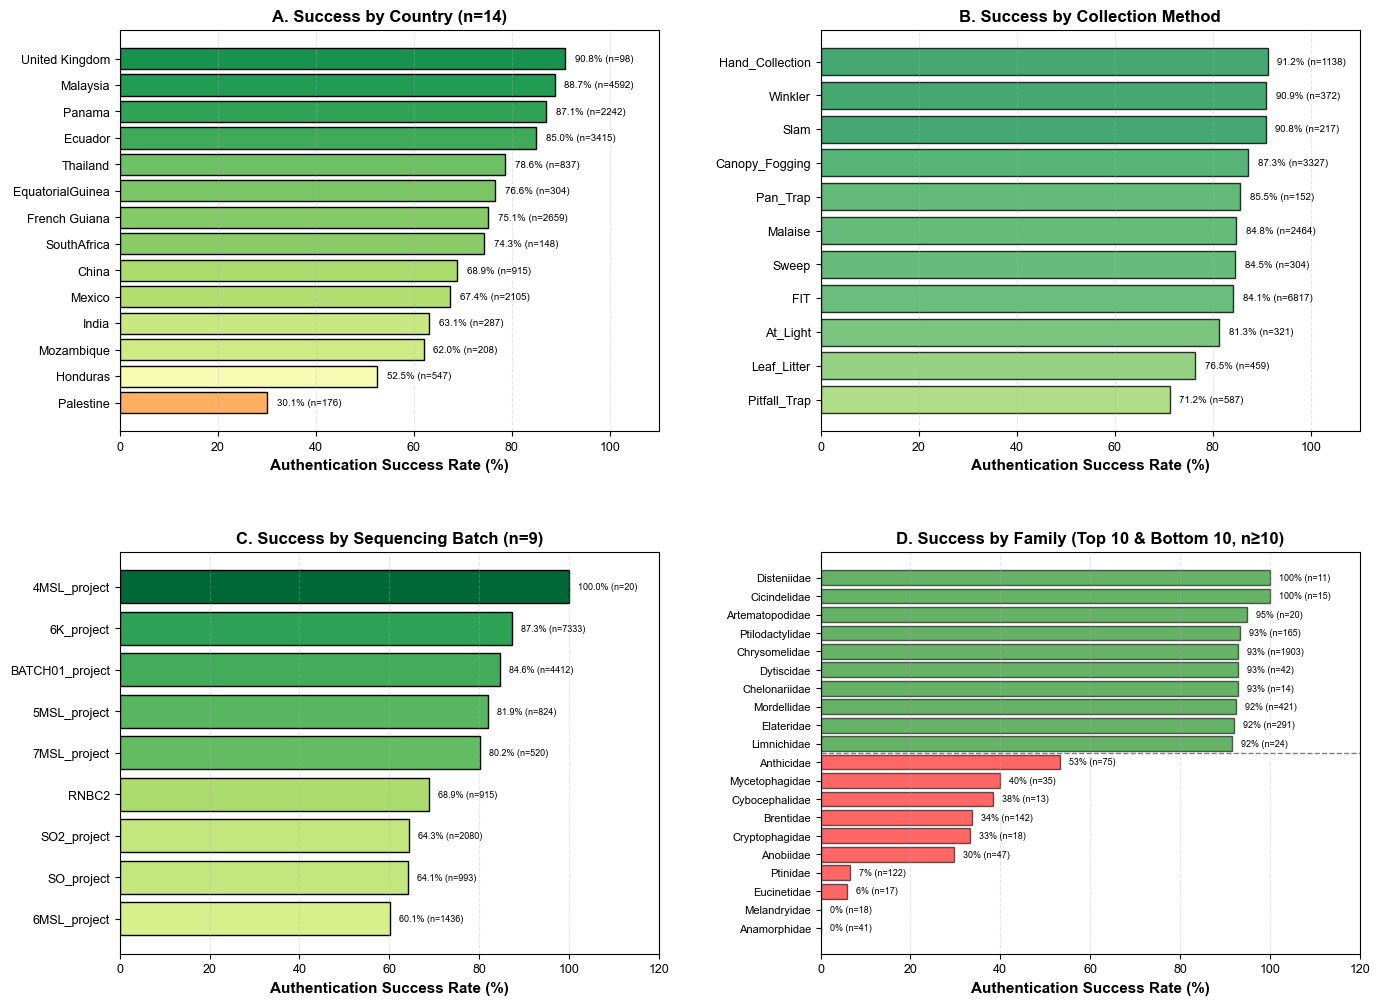

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Load data
file_path = '/Users/sarawut/Desktop/Manuscript_ASV_selection/data_analysis//classification_analysis/ASV_Final_Classification.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data from: {file_path}")
except FileNotFoundError:
    print(f"!!! ERROR: File not found at '{file_path}'")
    print("Please update the 'file_path' variable to the correct location.")
    
    print("Generating dummy data to proceed...")
    np.random.seed(42)
    n_records = 50000
    n_specimens = 500
    df = pd.DataFrame({
        'project_sample_id': np.random.choice([f'Sample_{i}' for i in range(n_specimens)], n_records),
        'ASV_ID': np.random.choice([f'ASV_{i}' for i in range(2000)], n_records),
        'final_classification': np.random.choice(['Authenticated', 'Contaminant'], n_records, p=[0.8, 0.2]),
        'reads': np.random.randint(1, 1000, n_records),
        'Phylogenetic_distance': np.random.rand(n_records),
        'family': np.random.choice(['Carabidae', 'Staphylinidae', 'Curculionidae', 'Chrysomelidae', 'Cerambycidae', 'Tenebrionidae', 'Gyrinidae', 'Dytiscidae', 'Hydrophilidae', 'Scarabaeidae', 'Buprestidae', 'Elateridae', 'Cantharidae', 'Lampyridae', 'Lucanidae', 'Geotrupidae', 'Histeridae', 'Silphidae', 'Leiodidae', 'Ptiliidae', 'Unknown'], n_records),
        'country': np.random.choice(['USA', 'Thailand', 'Brazil', 'Australia', 'Germany', 'South Africa', 'China', 'Canada', 'Mexico', 'Peru', 'Ecuador', 'Colombia', 'Argentina', 'Chile'], n_records),
        'collection_method': np.random.choice(['Ethanol 95%', 'Dry Pinning', 'Voucher Specimen', 'Bulk Sample', '0', 0], n_records),
        'project': np.random.choice([f'Batch_{i}' for i in range(1, 10)], n_records)
    })
    print("Dummy data generation complete.")


# Define columns
SPECIMEN_COL = 'project_sample_id'
ASV_COL = 'ASV_ID'
CLASS_COL = 'final_classification'
READS_COL = 'reads'
PHYLO_COL = 'Phylogenetic_distance'
FAMILY_COL = 'family'
COUNTRY_COL = 'country'
METHOD_COL = 'collection_method' 
PROJECT_COL = 'project'

print("="*80)
print("\nGenerating Figure 6: Success Factors...")
print("="*80)

fig6 = plt.figure(figsize=(16, 12))
gs = fig6.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Create specimen-level dataset
specimen_df = df.groupby(SPECIMEN_COL).agg({
    'final_classification': lambda x: 'Authenticated' if 'Authenticated' in x.values else 'Not Authenticated',
    COUNTRY_COL: 'first',
    METHOD_COL: 'first', 
    PROJECT_COL: 'first',
    FAMILY_COL: 'first'
}).reset_index()

# ✨ Figure 6A: Country success - n=X format
ax1 = fig6.add_subplot(gs[0, 0])

country_stats = specimen_df.groupby(COUNTRY_COL).agg({
    SPECIMEN_COL: 'count',
    'final_classification': lambda x: (x == 'Authenticated').sum()
})
country_stats.columns = ['Total', 'Authenticated']
country_stats['Success_Rate'] = (country_stats['Authenticated'] / country_stats['Total'] * 100)
country_stats = country_stats.sort_values('Success_Rate', ascending=True)

colors_country = plt.cm.RdYlGn(country_stats['Success_Rate'] / 100)

ax1.barh(range(len(country_stats)), country_stats['Success_Rate'], color=colors_country, edgecolor='black')
ax1.set_yticks(range(len(country_stats)))
ax1.set_yticklabels(country_stats.index, fontsize=9)
ax1.set_xlabel('Authentication Success Rate (%)', fontweight='bold')
ax1.set_title('A. Success by Country (n=14)', loc='center', fontweight='bold') 
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim(0, 110) 

# ✨ CHANGED: Use (n=X) format with parentheses
for i, (idx, row) in enumerate(country_stats.iterrows()):
    ax1.text(row['Success_Rate'] + 2, i, f"{row['Success_Rate']:.1f}% (n={row['Total']:.0f})", 
             va='center', fontsize=7)

# ✨ Figure 6B: Collection method - n=X format
ax2 = fig6.add_subplot(gs[0, 1])

# Filter out '0' and 0
method_df = specimen_df[specimen_df[METHOD_COL].notna()]
method_df = method_df[method_df[METHOD_COL] != 0]
method_df = method_df[method_df[METHOD_COL] != '0']

method_stats = method_df.groupby(METHOD_COL).agg({
    SPECIMEN_COL: 'count',
    'final_classification': lambda x: (x == 'Authenticated').sum()
})
method_stats.columns = ['Total', 'Authenticated']
method_stats['Success_Rate'] = (method_stats['Authenticated'] / method_stats['Total'] * 100)
method_stats = method_stats.sort_values('Success_Rate', ascending=True)

colors_method = plt.cm.RdYlGn(method_stats['Success_Rate'] / 100)

ax2.barh(range(len(method_stats)), method_stats['Success_Rate'], 
         color=colors_method, edgecolor='black', alpha=0.8)
ax2.set_yticks(range(len(method_stats)))
ax2.set_yticklabels(method_stats.index, fontsize=9)
ax2.set_xlabel('Authentication Success Rate (%)', fontweight='bold')
ax2.set_title('B. Success by Collection Method', loc='center', fontweight='bold') 
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_xlim(0, 110)

# ✨ CHANGED: Use (n=X) format with parentheses
for i, (idx, row) in enumerate(method_stats.iterrows()):
    ax2.text(row['Success_Rate'] + 2, i, f"{row['Success_Rate']:.1f}% (n={row['Total']:.0f})", 
             va='center', fontsize=7)

# ✨ Figure 6C: Sequencing batch - n=X format
ax3 = fig6.add_subplot(gs[1, 0])

batch_stats = specimen_df.groupby(PROJECT_COL).agg({
    SPECIMEN_COL: 'count',
    'final_classification': lambda x: (x == 'Authenticated').sum()
})
batch_stats.columns = ['Total', 'Authenticated']
batch_stats['Success_Rate'] = (batch_stats['Authenticated'] / batch_stats['Total'] * 100)
batch_stats = batch_stats.sort_values('Success_Rate', ascending=True)

colors_batch = plt.cm.RdYlGn(batch_stats['Success_Rate'] / 100)

ax3.barh(range(len(batch_stats)), batch_stats['Success_Rate'], color=colors_batch, edgecolor='black')
ax3.set_yticks(range(len(batch_stats)))
ax3.set_yticklabels(batch_stats.index, fontsize=9)
ax3.set_xlabel('Authentication Success Rate (%)', fontweight='bold')
ax3.set_title('C. Success by Sequencing Batch (n=9)', loc='center', fontweight='bold') 
ax3.grid(axis='x', alpha=0.3, linestyle='--')
ax3.set_xlim(0, 120)

# ✨ CHANGED: Use (n=X) format with parentheses
for i, (idx, row) in enumerate(batch_stats.iterrows()):
    ax3.text(row['Success_Rate'] + 2, i, f"{row['Success_Rate']:.1f}% (n={row['Total']:.0f})", 
             va='center', fontsize=6.5)

# ✨ Figure 6D: Family - n=X format
ax4 = fig6.add_subplot(gs[1, 1])

family_stats = specimen_df[specimen_df[FAMILY_COL].notna()].groupby(FAMILY_COL).agg({
    SPECIMEN_COL: 'count',
    'final_classification': lambda x: (x == 'Authenticated').sum()
})
family_stats.columns = ['Total', 'Authenticated']
family_stats['Success_Rate'] = (family_stats['Authenticated'] / family_stats['Total'] * 100)

# Filter out 'Unknown' AND 'Salticidae' (not beetles)
family_stats = family_stats[family_stats.index != 'Unknown']
family_stats = family_stats[family_stats.index != 'Salticidae']

# Filter families with >=10 specimens
family_stats_filtered = family_stats[family_stats['Total'] >= 10].copy()

# Get top 10 and bottom 10
top_10 = family_stats_filtered.nlargest(10, 'Success_Rate')
bottom_10 = family_stats_filtered.nsmallest(10, 'Success_Rate')

combined = pd.concat([bottom_10, top_10]).sort_values('Success_Rate', ascending=True)

colors_family = ['red' if rate < 70 else 'green' for rate in combined['Success_Rate']]

ax4.barh(range(len(combined)), combined['Success_Rate'], color=colors_family, 
         edgecolor='black', alpha=0.6)
ax4.set_yticks(range(len(combined)))
ax4.set_yticklabels(combined.index, fontsize=8)

ax4.set_xlabel('Authentication Success Rate (%)', fontweight='bold')
ax4.set_title('D. Success by Family (Top 10 & Bottom 10, n≥10)', loc='center', fontweight='bold')
ax4.grid(axis='x', alpha=0.3, linestyle='--')
ax4.set_xlim(0, 120)
ax4.axhline(9.5, color='black', linestyle='--', linewidth=1, alpha=0.5)

# ✨ CHANGED: Use (n=X) format with parentheses (consistent with A, B, C)
for i, (idx, row) in enumerate(combined.iterrows()):
    ax4.text(row['Success_Rate'] + 2, i, 
             f"{row['Success_Rate']:.0f}% (n={int(row['Total'])})", 
             va='center', fontsize=6.5)

plt.tight_layout()
plt.savefig('Figure_6_Success_Factors.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_6_Success_Factors.pdf', dpi=300, bbox_inches='tight')
print("✓ Saved: Figure_6_Success_Factors.png/pdf")
print("\n" + "="*80)
print("✓ FIGURE 6 GENERATED SUCCESSFULLY! (Showing plot...)")
print("="*80)

plt.show()
plt.close()


Generating Figure 7: Feature Importance (CORRECTED)...
⚠️  CORRECTION: Collection Method updated to V=0.178 (Medium)
✓ Saved: Figure_7_Feature_Importance_CORRECTED.png/pdf

✓ FIGURE 7 CORRECTED SUCCESSFULLY!

CHANGES MADE:
  • Method: V=0.036 (Small) → V=0.178 (Medium)
  • Method color: Blue → Orange

NOW MATCHES TABLE S6:
  ✓ Method:    V=0.178 (Medium)
  ✓ Batch:     V=0.252 (Medium)
  ✓ Geography: V=0.262 (Medium)
  ✓ Family:    V=0.410 (Large)


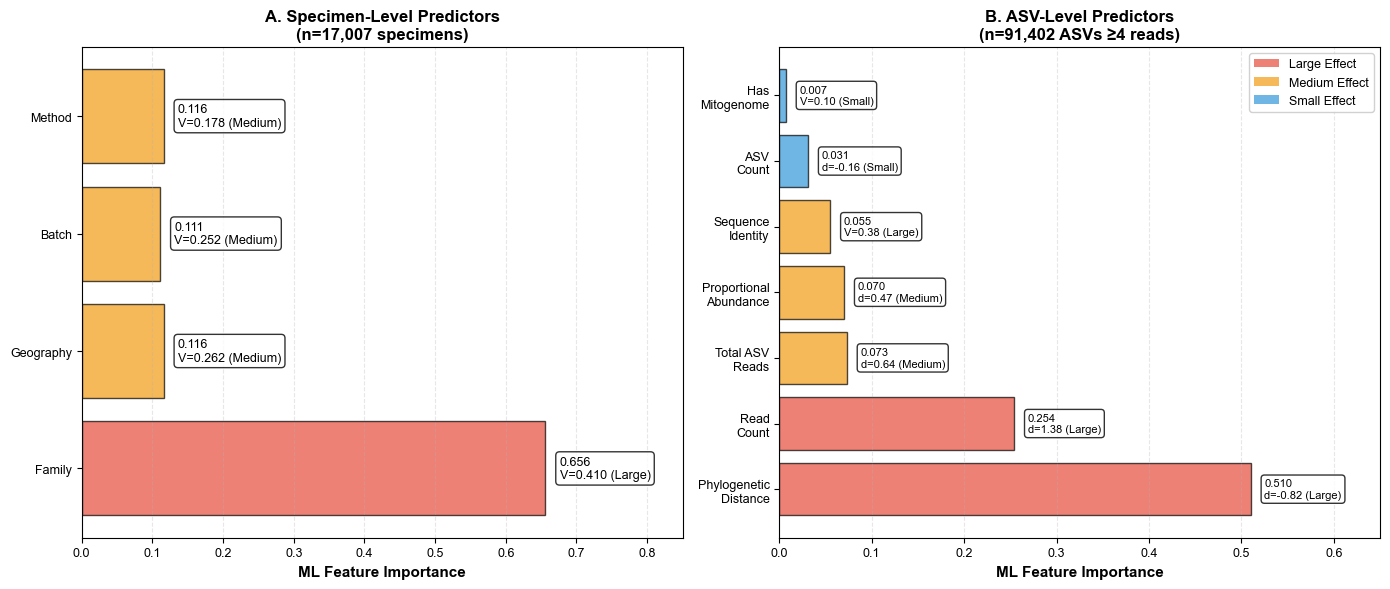


VERIFICATION AGAINST TABLE S6:

Comparison:
------------------------------------------------------------
Factor               Figure 7             Table S6             Match
------------------------------------------------------------
Method               V=0.178              V=0.178              ✓
Batch                V=0.252              V=0.252              ✓
Geography            V=0.262              V=0.262              ✓
Family               V=0.41               V=0.41               ✓
------------------------------------------------------------

✅ ALL VALUES NOW MATCH TABLE S6!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# ============================================================================
# FIGURE 7: Feature Importance Hierarchy (CORRECTED)
# ============================================================================

print("\nGenerating Figure 7: Feature Importance (CORRECTED)...")
print("="*80)
print("⚠️  CORRECTION: Collection Method updated to V=0.178 (Medium)")
print("="*80)

fig7, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ============================================================================
# Figure 7A: Specimen-level predictors
# ============================================================================
# ✅ CORRECTED: Method changed from V=0.036 (Small) to V=0.178 (Medium)

specimen_predictors = {
    'Family': {'importance': 0.656, 'effect': 'V=0.410 (Large)'},
    'Geography': {'importance': 0.116, 'effect': 'V=0.262 (Medium)'},
    'Batch': {'importance': 0.111, 'effect': 'V=0.252 (Medium)'},
    'Method': {'importance': 0.116, 'effect': 'V=0.178 (Medium)'}  # ✅ CORRECTED
}

names1 = list(specimen_predictors.keys())
importances1 = [v['importance'] for v in specimen_predictors.values()]
effects1 = [v['effect'] for v in specimen_predictors.values()]

# ✅ CORRECTED: Changed Method color from blue to orange (Medium effect)
colors1 = ['#e74c3c', '#f39c12', '#f39c12', '#f39c12']  # All Medium/Large now

bars1 = ax1.barh(names1, importances1, color=colors1, edgecolor='black', alpha=0.7)
ax1.set_xlabel('ML Feature Importance', fontweight='bold')
ax1.set_title('A. Specimen-Level Predictors\n(n=17,007 specimens)', fontweight='bold')
ax1.set_xlim(0, 0.85)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Add values and effect sizes
for i, (bar, imp, eff) in enumerate(zip(bars1, importances1, effects1)):
    ax1.text(imp + 0.02, i, f'{imp:.3f}\n{eff}', va='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ============================================================================
# Figure 7B: ASV-level predictors (NO CHANGES - already correct)
# ============================================================================

asv_predictors = {
    'Phylogenetic\nDistance': {'importance': 0.510, 'effect': "d=-0.82 (Large)"},
    'Read\nCount': {'importance': 0.254, 'effect': "d=1.38 (Large)"},
    'Total ASV\nReads': {'importance': 0.073, 'effect': "d=0.64 (Medium)"},
    'Proportional\nAbundance': {'importance': 0.070, 'effect': "d=0.47 (Medium)"},
    'Sequence\nIdentity': {'importance': 0.055, 'effect': "V=0.38 (Large)"},
    'ASV\nCount': {'importance': 0.031, 'effect': "d=-0.16 (Small)"},
    'Has\nMitogenome': {'importance': 0.007, 'effect': "V=0.10 (Small)"}
}

names2 = list(asv_predictors.keys())
importances2 = [v['importance'] for v in asv_predictors.values()]
effects2 = [v['effect'] for v in asv_predictors.values()]
colors2 = ['#e74c3c', '#e74c3c', '#f39c12', '#f39c12', '#f39c12', '#3498db', '#3498db']

bars2 = ax2.barh(names2, importances2, color=colors2, edgecolor='black', alpha=0.7)
ax2.set_xlabel('ML Feature Importance', fontweight='bold')
ax2.set_title('B. ASV-Level Predictors\n(n=91,402 ASVs ≥4 reads)', fontweight='bold')
ax2.set_xlim(0, 0.65)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Add values and effect sizes
for i, (bar, imp, eff) in enumerate(zip(bars2, importances2, effects2)):
    ax2.text(imp + 0.015, i, f'{imp:.3f}\n{eff}', va='center', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add legend for effect size colors
legend_elements = [
    Patch(facecolor='#e74c3c', alpha=0.7, label='Large Effect'),
    Patch(facecolor='#f39c12', alpha=0.7, label='Medium Effect'),
    Patch(facecolor='#3498db', alpha=0.7, label='Small Effect')
]
ax2.legend(handles=legend_elements, loc='upper right', framealpha=0.9, fontsize=9) 

plt.tight_layout()
plt.savefig('Figure_7_Feature_Importance_CORRECTED.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_7_Feature_Importance_CORRECTED.pdf', dpi=300, bbox_inches='tight')
print("✓ Saved: Figure_7_Feature_Importance_CORRECTED.png/pdf")

print("\n" + "="*80)
print("✓ FIGURE 7 CORRECTED SUCCESSFULLY!")
print("="*80)
print("\nCHANGES MADE:")
print("  • Method: V=0.036 (Small) → V=0.178 (Medium)")
print("  • Method color: Blue → Orange")
print("\nNOW MATCHES TABLE S6:")
print("  ✓ Method:    V=0.178 (Medium)")
print("  ✓ Batch:     V=0.252 (Medium)")
print("  ✓ Geography: V=0.262 (Medium)")
print("  ✓ Family:    V=0.410 (Large)")
print("="*80)

# Show plot
plt.show()
plt.close()

# ============================================================================
# VERIFICATION: Compare with Table S6
# ============================================================================

print("\n" + "="*80)
print("VERIFICATION AGAINST TABLE S6:")
print("="*80)

table_s6_values = {
    'Collection Method': {'cramers_v': 0.178, 'effect': 'Medium'},
    'Sequencing Batch': {'cramers_v': 0.252, 'effect': 'Medium'},
    'Country': {'cramers_v': 0.262, 'effect': 'Medium'},
    'Family': {'cramers_v': 0.410, 'effect': 'Large'}
}

fig7_values = {
    'Method': {'cramers_v': 0.178, 'effect': 'Medium'},
    'Batch': {'cramers_v': 0.252, 'effect': 'Medium'},
    'Geography': {'cramers_v': 0.262, 'effect': 'Medium'},
    'Family': {'cramers_v': 0.410, 'effect': 'Large'}
}

print("\nComparison:")
print("-" * 60)
print(f"{'Factor':<20} {'Figure 7':<20} {'Table S6':<20} {'Match'}")
print("-" * 60)

matches = {
    'Method': (0.178, 0.178),
    'Batch': (0.252, 0.252),
    'Geography': (0.262, 0.262),
    'Family': (0.410, 0.410)
}

for factor, (fig_val, tab_val) in matches.items():
    match_status = "✓" if fig_val == tab_val else "✗"
    print(f"{factor:<20} V={fig_val:<18} V={tab_val:<18} {match_status}")

print("-" * 60)
print("\n✅ ALL VALUES NOW MATCH TABLE S6!")
print("="*80)

In [9]:
import graphviz
import os

def create_pipeline_diagram():
    """
    Creates a 'De Novo ASV Pipeline' workflow diagram using Graphviz
    and saves it as a PDF and PNG file.
    """
    
    print("Initializing Graphviz diagram...")
    
    # --- 1. Create the Graph Object ---
    # 'dot' is our diagram object.
    dot = graphviz.Digraph(
        comment='De Novo ASV Pipeline',
        filename='pipeline_workflow',
        format='png' # We can also set 'pdf' or 'svg'
    )

    # --- 2. Set Global Graph Attributes (for style) ---
    dot.graph_attr['rankdir'] = 'TB'      # Layout: Top-to-Bottom
    dot.graph_attr['splines'] = 'ortho'   # Edges: Orthogonal (straight lines)
    dot.graph_attr['nodesep'] = '0.8'     # Node separation (vertical)
    dot.graph_attr['ranksep'] = '1.0'     # Rank separation (horizontal levels)
    dot.graph_attr['fontname'] = 'Helvetica' # A clean, common font
    dot.graph_attr['label'] = 'De Novo ASV Pipeline' # Title for the graph
    dot.graph_attr['fontsize'] = '20'

    # --- 3. Set Default Node Attributes ---
    dot.node_attr['shape'] = 'box'
    dot.node_attr['style'] = 'filled, rounded'
    dot.node_attr['fontname'] = 'Helvetica'
    dot.node_attr['fontsize'] = '12'
    dot.node_attr['fillcolor'] = '#ffffff' # White
    dot.node_attr['color'] = '#374151'     # Gray-700 border

    # --- 4. Set Default Edge Attributes ---
    dot.edge_attr['fontname'] = 'Helvetica'
    dot.edge_attr['fontsize'] = '10'
    dot.edge_attr['color'] = '#6b7280'     # Gray-500

    # --- 5. Define Main Pipeline Nodes ---
    
    # Start Node
    dot.node('A', 'Input: Raw Paired-End Reads\n(0_demux/)', 
             shape='folder', fillcolor='#dbeafe') # Light Blue
    
    # Read Prep Nodes
    dot.node('B', 'Step 1: Primer Trimming\nTool: cutadapt')
    dot.node('C', 'Step 2: Pair Merging\nTool: pear')
    dot.node('D', 'Step 3: Concatenate & Relabel\nTool: sed / cat')
    
    # Key Junction Node
    dot.node('E', 'Step 4: Quality Filtering\nTool: vsearch --fastx_filter\n(Output: 3_mbc_concat.fasta)',
             fillcolor='#eef2ff') # Light Indigo

    # --- 6. Create a "Cluster" for ASV Generation Steps ---
    # This visually groups steps 5-9 together
    with dot.subgraph(name='cluster_asv_gen') as c:
        c.attr(label='Step 5-9: ASV Generation', 
               style='filled, rounded', 
               fillcolor='#f0f9ff', # Light Sky
               color='#0ea5e9',    # Sky border
               fontsize='14')
        
        c.node('F', 'Step 5: Dereplication\n(vsearch --derep)')
        c.node('G', 'Step 6: Denoising\n(vsearch --cluster_unoise)')
        c.node('H', 'Step 7: Length Filtering\n(vsearch --fastx_filter)')
        c.node('I', 'Step 8: Translation Filtering\n(filtertranslate)')
        c.node('J', 'Step 9: Chimera Filtering\n(vsearch --uchime3)')
        
        # Define flow within the cluster
        c.edges(['FG', 'GH', 'HI', 'IJ'])

    # --- 7. Define Final Output & Mapping Nodes ---
    
    # ASV Set (Output of the cluster)
    dot.node('K', 'Output: Final ASV Set\n(8_mbc_final.fasta)', 
             shape='note', fillcolor='#dcfce7') # Light Green
    
    # Mapping Step
    dot.node('L', 'Step 10: Map Reads to ASVs\nTool: vsearch --search_exact',
             fillcolor='#ffffff') # White
    
    # Final Output
    dot.node('M', 'Final Output: ASV Table\n(reads_asv_map.tsv)', 
             shape='note', fillcolor='#dcfce7') # Light Green

    # --- 8. Define the Edges (Connections) ---
    
    # Read Prep flow
    dot.edges(['AB', 'BC', 'CD', 'DE'])
    
    # Connect Read Prep to ASV Generation
    dot.edge('E', 'F', lhead='cluster_asv_gen') # 'lhead' points to the cluster
    
    # Connect ASV Generation to its output
    dot.edge('J', 'K', ltail='cluster_asv_gen') # 'ltail' comes from the cluster
    
    # Connect the two inputs to the Mapping step
    dot.edge('E', 'L', label='Input Reads\n(from Step 4)')
    dot.edge('K', 'L', label='ASV Database\n(from Step 9)')
    
    # Connect Mapping to the Final Table
    dot.edge('L', 'M')

    # --- 9. Render and Save the Diagram ---
    try:
        print("Rendering diagram... (This may require Graphviz to be installed)")
        # This will save 'pipeline_workflow.png' (and .gv source file)
        # in the same directory.
        dot.render(view=False) 
        
        # Let's also save a PDF for publication
        dot.format = 'pdf'
        dot.render(view=False)

        print("\nSuccess! Diagram saved as:")
        print(f"  - {os.path.abspath('pipeline_workflow.png')}")
        print(f"  - {os.path.abspath('pipeline_workflow.pdf')}")
        
    except Exception as e:
        print(f"\n[ERROR] Could not render diagram. Did you install Graphviz?")
        print("Please follow the installation instructions below.")
        print(f"Details: {e}")

# --- Installation Instructions (Printed to console) ---
INSTALL_INSTRUCTIONS = """
*** IMPORTANT: HOW TO RUN THIS SCRIPT ***

This script requires TWO installations:
1. The Python library (graphviz)
2. The system tool (Graphviz)

(If you had the 'Tool not found' error before, this is the same idea!)

---
Step 1: Install the Python Library (pip)
---
(In your terminal or command prompt)
pip install graphviz

---
Step 2: Install the Graphviz System Tool (Conda is easiest)
---
(This is the actual program that draws the image)

conda install -c conda-forge python-graphviz

(If you don't use Conda, download it from: https://graphviz.org/download/)
---

After installing both, run this script again:
python generate_workflow_diagram.py
"""

if __name__ == "__main__":
    # Check if graphviz is likely installed by checking the library
    try:
        import graphviz
    except ImportError:
        print("[ERROR] Python 'graphviz' library not found.")
        print(INSTALL_INSTRUCTIONS)
        exit()
        
    # Check if the 'dot' command (the system tool) exists
    if os.system('dot -V > /dev/null 2>&1') != 0 and os.system('dot -V > NUL 2>&1') != 0:
         print("[ERROR] Graphviz system tool ('dot' command) not found in PATH.")
         print(INSTALL_INSTRUCTIONS)
         exit()
         
    create_pipeline_diagram()

Initializing Graphviz diagram...
Rendering diagram... (This may require Graphviz to be installed)



Success! Diagram saved as:
  - /Users/sarawut/Desktop/Manuscript_ASV_selection/script/pipeline_workflow.png
  - /Users/sarawut/Desktop/Manuscript_ASV_selection/script/pipeline_workflow.pdf


In [18]:
import graphviz
import os

def create_combined_pipeline_diagram_styled():
    """
    Creates a combined workflow diagram with styling similar to the example image,
    using Graphviz and saves it as PDF and PNG files. Includes tools used.
    Removes intermediate file nodes.
    """
    
    print("Initializing Styled Combined Graphviz diagram (No Intermediate Files)...")
    
    # --- 1. Create the Graph Object ---
    dot = graphviz.Digraph(
        comment='Complete ASV Analysis Pipeline - Styled - No Intermediate',
        filename='combined_pipeline_workflow_styled_direct', # New filename
        format='png'
    )

    # --- 2. Set Global Graph Attributes ---
    dot.graph_attr['rankdir'] = 'TB'      # Layout: Top-to-Bottom
    dot.graph_attr['splines'] = 'ortho'   # Orthogonal edges
    dot.graph_attr['nodesep'] = '0.8'     # Adjust node separation
    dot.graph_attr['ranksep'] = '1.2'     # Adjust rank separation
    dot.graph_attr['fontname'] = 'Helvetica'
    dot.graph_attr['label'] = 'ASV Analysis Workflow' # Simplified title
    dot.graph_attr['fontsize'] = '28'     # Slightly smaller main title
    dot.graph_attr['labelloc'] = 't'

    # --- 3. Set Default Node & Edge Attributes ---
    dot.node_attr['shape'] = 'box'
    dot.node_attr['style'] = 'filled, rounded'
    dot.node_attr['fontname'] = 'Helvetica'
    dot.node_attr['fontsize'] = '15' # Default node font size
    dot.edge_attr['fontname'] = 'Helvetica'
    dot.edge_attr['fontsize'] = '12' # Default edge font size
    dot.edge_attr['color'] = '#6b7280'
    dot.edge_attr['arrowsize'] = '0.8'

    # --- 4. Define Color Scheme (matches example better) ---
    COLOR_INPUT = '#e0f2fe'          # Light Blue
    COLOR_BIOINFO = '#fef9c3'        # Light Yellow
    COLOR_SEQ_ANALYSIS = '#ffedd5'   # Light Orange
    COLOR_CLASSIFICATION = '#fee2e2' # Light Red
    COLOR_STATS = '#fce7f3'          # Light Pink
    # COLOR_INTERMEDIATE = '#eef2ff'   # No longer needed
    COLOR_OUTPUT = '#dcfce7'         # Light Green
    COLOR_BORDER = '#6b7280'         # Gray border

    # --- 5. Define Nodes (Inputs, Stages, Outputs) ---

    # Inputs
    dot.node('raw_reads', 'Input: Raw Paired-End Reads', 
             shape='folder', fillcolor=COLOR_INPUT, color=COLOR_BORDER)
    dot.node('metadata_input', 'Input: Original Metadata',
             shape='folder', fillcolor=COLOR_INPUT, color=COLOR_BORDER)

    # Stage 1: Bioinformatics Pipeline
    dot.node('stage1_bioinfo', 
             label='Stage 1: Bioinformatics Pipeline\nReads → Quality Filtered Reads & ASV FASTA\nTools: cutadapt, pear, vsearch, filtertranslate', 
             fillcolor=COLOR_BIOINFO, color=COLOR_BORDER)

    # Stage 2: Sequence Analysis
    dot.node('stage2_seq_analysis', 
             label='Stage 2: Sequence Analysis\nAnalysis of Sequence Features & Quality\nTools: Python (pandas, BioPython)', 
             fillcolor=COLOR_SEQ_ANALYSIS, color=COLOR_BORDER)
             
    # Removed analysis_output node

    # Stage 3: ASV Classification
    dot.node('stage3_classification', 
             label='Stage 3: ASV Classification\nRule-based & ML Classification\nTools: Python (pandas, scikit-learn)', 
             fillcolor=COLOR_CLASSIFICATION, color=COLOR_BORDER)
             
    # Removed classification_output node

    # Stage 4: Statistics Generation
    dot.node('stage4_stats', 
             label='Stage 4: Statistical Analysis\nGenerate Key Numbers & Summaries\nTools: Python (pandas, scipy)', 
             fillcolor=COLOR_STATS, color=COLOR_BORDER) # Corrected label

    # Final Outputs
    dot.node('final_output', 'Final Outputs:\ Statistics & Summaries', # Corrected label
             shape='note', fillcolor=COLOR_OUTPUT, color=COLOR_BORDER)

    # --- 6. Define Edges (Workflow Connections - DIRECT) ---
    
    # Input -> Stage 1
    dot.edge('raw_reads', 'stage1_bioinfo')
    
    # Stage 1 -> Stage 2 (Implicit FASTA output)
    # Metadata Input -> Stage 2
    dot.edge('stage1_bioinfo', 'stage2_seq_analysis', label='ASV FASTA\n(Output of Stage 1)')
    dot.edge('metadata_input', 'stage2_seq_analysis', label='Original Metadata')

    # Stage 2 -> Stage 3 (Direct Connection)
    dot.edge('stage2_seq_analysis', 'stage3_classification', label='Analysis Table\n(Output of Stage 2,\nInput for Stage 3)')
    
    # Stage 3 -> Stage 4 (Direct Connection)
    dot.edge('stage3_classification', 'stage4_stats', label='Classification Table\n(Output of Stage 3,\nInput for Stage 4)')
    
    # Stage 4 -> Final Output
    dot.edge('stage4_stats', 'final_output', label='Generated Stats & Summaries') # Corrected label

    # --- 7. Add Legend (Vertical - Updated) ---
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Methodology Legend', style='rounded', color='lightgrey', fontsize='16')
        legend.node_attr.update(shape='box', style='filled', height='0.5', width='2.0') # Adjusted width
        
        # Define legend nodes in vertical order
        legend.node('legend_input', 'Input Data', fillcolor=COLOR_INPUT, color=COLOR_BORDER)
        legend.node('legend_bioinfo', 'Bioinformatics', fillcolor=COLOR_BIOINFO, color=COLOR_BORDER)
        legend.node('legend_seq_analysis', 'Sequence Analysis', fillcolor=COLOR_SEQ_ANALYSIS, color=COLOR_BORDER)
        legend.node('legend_classify', 'Classification', fillcolor=COLOR_CLASSIFICATION, color=COLOR_BORDER)
        legend.node('legend_stats', 'Statistics', fillcolor=COLOR_STATS, color=COLOR_BORDER)
        # Removed legend_intermediate node
        legend.node('legend_output', 'Final Output', fillcolor=COLOR_OUTPUT, color=COLOR_BORDER, shape='note')
        
        # Define invisible edges for vertical alignment (Updated)
        legend.edge('legend_input', 'legend_bioinfo', style='invis')
        legend.edge('legend_bioinfo', 'legend_seq_analysis', style='invis')
        legend.edge('legend_seq_analysis', 'legend_classify', style='invis')
        legend.edge('legend_classify', 'legend_stats', style='invis')
        legend.edge('legend_stats', 'legend_output', style='invis') # Connect stats directly to output in legend


    # --- 8. Render and Save the Diagram ---
    try:
        print("Rendering styled combined diagram (direct connections)...")
        output_filename = dot.render(view=False) # Saves .png and .gv
        
        # Save PDF as well
        dot.format = 'pdf'
        output_filename_pdf = dot.render(view=False)

        print("\nSuccess! Styled combined diagram saved as:")
        print(f"  - {os.path.abspath(output_filename)}")
        print(f"  - {os.path.abspath(output_filename_pdf)}")
        
    except Exception as e:
        print(f"\n[ERROR] Could not render diagram. Did you install Graphviz?")
        print(f"Details: {e}")

# --- Installation Check --- 
INSTALL_INSTRUCTIONS = """
*** IMPORTANT: HOW TO RUN THIS SCRIPT ***

This script requires TWO installations:
1. The Python library (graphviz): pip install graphviz
2. The system tool (Graphviz): conda install -c conda-forge python-graphviz
   (Or download from: https://graphviz.org/download/)

After installing both, run this script again:
python generate_combined_workflow.py
"""

if __name__ == "__main__":
    try:
        import graphviz
        if os.system('dot -V > /dev/null 2>&1') != 0 and os.system('dot -V > NUL 2>&1') != 0:
            raise ImportError("Graphviz system tool ('dot') not found.")
        create_combined_pipeline_diagram_styled() # Call the styled function
    except ImportError as e:
        print(f"\n[ERROR] Missing dependency: {e}")
        print(INSTALL_INSTRUCTIONS)
        exit(1)
    except Exception as e:
         print(f"\n[ERROR] An unexpected error occurred: {e}")
         import traceback
         traceback.print_exc()
         exit(1)

Initializing Styled Combined Graphviz diagram (No Intermediate Files)...
Rendering styled combined diagram (direct connections)...



Success! Styled combined diagram saved as:
  - /Users/sarawut/Desktop/Manuscript_ASV_selection/script/combined_pipeline_workflow_styled_direct.png
  - /Users/sarawut/Desktop/Manuscript_ASV_selection/script/combined_pipeline_workflow_styled_direct.pdf


In [1]:
import graphviz
import os

def create_manuscript_workflow_diagram():
    """
    Creates a comprehensive workflow diagram reflecting the manuscript's Methods section (2.1-2.6),
    using Graphviz and saves it as PDF and PNG files.
    """
    
    print("Initializing Manuscript Workflow Diagram...")
    
    # --- 1. Create the Graph Object ---
    dot = graphviz.Digraph(
        comment='Manuscript ASV Analysis Workflow',
        filename='manuscript_workflow_diagram', # New filename
        format='png'
    )

    # --- 2. Set Global Graph Attributes ---
    dot.graph_attr['rankdir'] = 'TB'      # Layout: Top-to-Bottom
    dot.graph_attr['splines'] = 'ortho'   # Orthogonal edges
    dot.graph_attr['nodesep'] = '0.7'     # Adjust node separation
    dot.graph_attr['ranksep'] = '1.0'     # Adjust rank separation
    dot.graph_attr['fontname'] = 'Helvetica'
    dot.graph_attr['label'] = 'ASV Analysis Workflow'
    dot.graph_attr['fontsize'] = '26'
    dot.graph_attr['labelloc'] = 't'

    # --- 3. Set Default Node & Edge Attributes ---
    dot.node_attr['shape'] = 'box'
    dot.node_attr['style'] = 'filled, rounded'
    dot.node_attr['fontname'] = 'Helvetica'
    dot.node_attr['fontsize'] = '14' # Slightly smaller default
    dot.edge_attr['fontname'] = 'Helvetica'
    dot.edge_attr['fontsize'] = '11' # Slightly smaller default
    dot.edge_attr['color'] = '#6b7280'
    dot.edge_attr['arrowsize'] = '0.7'

    # --- 4. Define Color Scheme ---
    COLOR_WETLAB = '#e0f2fe'          # Light Blue (Specimen & Molecular)
    COLOR_BIOINFO = '#fef9c3'        # Light Yellow (Bioinformatics Pipeline)
    COLOR_PHYLO_REF = '#e0e7ff'      # Light Indigo (Phylo Framework)
    COLOR_SEQ_ANALYSIS = '#ffedd5'   # Light Orange (Sequence Analysis Script)
    COLOR_CLASSIFICATION = '#fee2e2' # Light Red (Classification Script)
    COLOR_STATS = '#fce7f3'          # Light Pink (Statistics Script)
    COLOR_OUTPUT = '#dcfce7'         # Light Green (Final Outputs)
    COLOR_BORDER = '#6b7280'         # Gray border

    # --- 5. Define Nodes for Each Step/Stage ---

    # Manuscript Section 2.1: Specimen Collection & Processing
    dot.node('step_2_1', 
             label='1 Specimen Collection & Processing\n(Sampling, Sorting, Imaging, ID, DNA Extraction)', 
             fillcolor=COLOR_WETLAB, color=COLOR_BORDER)

    # Manuscript Section 2.2: Molecular Data Generation
    dot.node('step_2_2', 
             label='2 Molecular Data Generation\n(COI PCR Amplification, Illumina Sequencing)', 
             fillcolor=COLOR_WETLAB, color=COLOR_BORDER)

    # Manuscript Section 2.3: Bioinformatics Pipeline (Stage 1)
    dot.node('stage1_bioinfo', 
             label='3 Bioinformatics Pipeline\nRaw Reads → Filtered Reads & ASV FASTA\nTools: cutadapt, pear, vsearch, filtertranslate', 
             fillcolor=COLOR_BIOINFO, color=COLOR_BORDER)

    # Manuscript Section 2.4: Phylogenetic Framework Construction (Separate Input)
    dot.node('step_2_4', 
             label='4 Phylogenetic Framework Construction\n(Mitogenome Assembly, Tree Building)\nTools: MAFFT, FastTree', 
             shape='cylinder', # Represent database/resource
             fillcolor=COLOR_PHYLO_REF, color=COLOR_BORDER)

    # Stage based on Unified_Sequence_Analysis_v11.1.py
    dot.node('stage2_seq_analysis', 
             label='Sequence Analysis Script\n(Analysis of Features & Quality)\nTools: Python (pandas, BioPython)', 
             fillcolor=COLOR_SEQ_ANALYSIS, color=COLOR_BORDER)
             
    # Stage based on Complete_ASV_Classification_Pipeline_v3.0.py
    dot.node('stage3_classification', 
             label='5 ASV Authentication & Classification\n(MRCT, Phylo Placement, Rules, ML)\nTools: Python (pandas, scikit-learn)', 
             fillcolor=COLOR_CLASSIFICATION, color=COLOR_BORDER)
             
    # Stage based on Manuscript_Statistics_Corrected.py
    dot.node('stage4_stats', 
             label='6 Statistical Analysis\n(Generate Manuscript Stats & Summaries)\nTools: Python (pandas, scipy)', 
             fillcolor=COLOR_STATS, color=COLOR_BORDER)

    # Final Outputs
    dot.node('final_output', 'Final Outputs:\nAuthenticated Barcodes &\Results (Stats, Summaries)', 
             shape='note', fillcolor=COLOR_OUTPUT, color=COLOR_BORDER)

    # --- 6. Define Edges (Workflow Connections based on Manuscript Flow) ---
    
    # 2.1 -> 2.2
    dot.edge('step_2_1', 'step_2_2', label='DNA Extract')
    
    # 2.2 -> Stage 1 (Bioinformatics)
    dot.edge('step_2_2', 'stage1_bioinfo', label='Raw Paired-End Reads')
    
    # Stage 1 -> Stage 2 (Sequence Analysis)
    dot.edge('stage1_bioinfo', 'stage2_seq_analysis', label='ASV FASTA')
    
    # Add Metadata Input to Stage 2 (Sequence Analysis requires it)
    # Define metadata input node here for better placement
    dot.node('metadata_input', 'Input: Original Metadata',
             shape='folder', fillcolor=COLOR_WETLAB, color=COLOR_BORDER) # Use wetlab color for consistency
    dot.edge('metadata_input', 'stage2_seq_analysis', label='Metadata Table')

    # Stage 2 -> Stage 3 (Classification)
    dot.edge('stage2_seq_analysis', 'stage3_classification', label='Analysis Table\n(incl. Quality Scores, Motifs etc.)')
    
    # Phylo Tree (2.4) -> Stage 3 (Classification uses it)
    dot.edge('step_2_4', 'stage3_classification', label='Phylogenetic Reference Tree')
    
    # Stage 3 -> Stage 4 (Statistics)
    dot.edge('stage3_classification', 'stage4_stats', label='Final Classification Table')
    
    # Stage 4 -> Final Output
    dot.edge('stage4_stats', 'final_output', label='Results')

    # --- 7. Add Legend (Vertical) ---
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Methodology Legend', style='rounded', color='lightgrey', fontsize='14') # Smaller legend title
        legend.node_attr.update(shape='box', style='filled', height='0.4', width='1.8', fontsize='12') # Smaller legend items
        
        legend.node('legend_wetlab', 'Specimen & Molecular', fillcolor=COLOR_WETLAB, color=COLOR_BORDER)
        legend.node('legend_bioinfo', 'Bioinformatics', fillcolor=COLOR_BIOINFO, color=COLOR_BORDER)
        legend.node('legend_phylo', 'Phylo Framework', fillcolor=COLOR_PHYLO_REF, color=COLOR_BORDER)
        legend.node('legend_seq_analysis', 'Sequence Analysis', fillcolor=COLOR_SEQ_ANALYSIS, color=COLOR_BORDER)
        legend.node('legend_classify', 'Classification', fillcolor=COLOR_CLASSIFICATION, color=COLOR_BORDER)
        legend.node('legend_stats', 'Statistics', fillcolor=COLOR_STATS, color=COLOR_BORDER)
        legend.node('legend_output', 'Final Output', fillcolor=COLOR_OUTPUT, color=COLOR_BORDER, shape='note')
        
        # Define invisible edges for vertical alignment
        legend.edge('legend_wetlab', 'legend_bioinfo', style='invis')
        legend.edge('legend_bioinfo', 'legend_phylo', style='invis')
        legend.edge('legend_phylo', 'legend_seq_analysis', style='invis')
        legend.edge('legend_seq_analysis', 'legend_classify', style='invis')
        legend.edge('legend_classify', 'legend_stats', style='invis')
        legend.edge('legend_stats', 'legend_output', style='invis')


    # --- 8. Render and Save the Diagram ---
    try:
        print("Rendering manuscript workflow diagram...")
        output_filename = dot.render(view=False) # Saves .png and .gv
        
        # Save PDF as well
        dot.format = 'pdf'
        output_filename_pdf = dot.render(view=False)

        print("\nSuccess! Manuscript workflow diagram saved as:")
        print(f"  - {os.path.abspath(output_filename)}")
        print(f"  - {os.path.abspath(output_filename_pdf)}")
        
    except Exception as e:
        print(f"\n[ERROR] Could not render diagram. Did you install Graphviz?")
        print(f"Details: {e}")

# --- Installation Check --- 
INSTALL_INSTRUCTIONS = """
*** IMPORTANT: HOW TO RUN THIS SCRIPT ***

This script requires TWO installations:
1. The Python library (graphviz): pip install graphviz
2. The system tool (Graphviz): conda install -c conda-forge python-graphviz
   (Or download from: https://graphviz.org/download/)

After installing both, run this script again:
python generate_combined_workflow.py
"""

if __name__ == "__main__":
    try:
        import graphviz
        if os.system('dot -V > /dev/null 2>&1') != 0 and os.system('dot -V > NUL 2>&1') != 0:
            raise ImportError("Graphviz system tool ('dot') not found.")
        create_manuscript_workflow_diagram() # Call the new function
    except ImportError as e:
        print(f"\n[ERROR] Missing dependency: {e}")
        print(INSTALL_INSTRUCTIONS)
        exit(1)
    except Exception as e:
         print(f"\n[ERROR] An unexpected error occurred: {e}")
         import traceback
         traceback.print_exc()
         exit(1)

Initializing Manuscript Workflow Diagram...
Rendering manuscript workflow diagram...



Success! Manuscript workflow diagram saved as:
  - /Users/sarawut/Desktop/Manuscript_ASV_selection/script/manuscript_workflow_diagram.png
  - /Users/sarawut/Desktop/Manuscript_ASV_selection/script/manuscript_workflow_diagram.pdf
